# <span style='color:gold;'>Synthesize and Analyze an "Impossible Chord"

## Step1 导入所需库

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# Step 2: 定义不可能的和弦与频率

In [29]:
# 定义不可能的和弦与频率
def get_note_frequencies():
    # 国际标准音高频率
    notes = {'C0': 16.35, 'C4': 261.63, 'C8': 4186.01}
    return notes
notes = get_note_frequencies()
print('C0频率:', notes['C0'], 'Hz')
print('C4频率:', notes['C4'], 'Hz')
print('C8频率:', notes['C8'], 'Hz')
# 物理/生理原因解释见markdown

C0频率: 16.35 Hz
C4频率: 261.63 Hz
C8频率: 4186.01 Hz


本节定义了C0、C4、C8三个音符，现在解释为何这种和弦无法被人类或传统乐器演奏。

---

### 为什么这是“不可能的和弦”？

1. **物理限制**：  
   传统乐器（如钢琴、吉他）无法同时发出跨度8个八度的音符。人手也无法同时按下如此远距离的琴键或品格。

2. **乐器音域限制**：  
   大多数乐器的最低音和最高音都远达不到C0和C8，只有极少数电子乐器能覆盖如此宽广的频率范围。

3. **人耳听觉极限**：  
   C0（16.35Hz）接近人耳最低可听频率，C8（4186Hz）接近高频极限。极低和极高音符在实际听觉中很难被清晰分辨。

4. **实际演奏不可行**：  
   无论是单一乐器还是多名演奏者，都无法在现实中同时演奏这三个音，只有数字合成才能实现。

---

# Step 3: 生成单个音符信号（含ADSR包络和钢琴音色）

In [30]:
sr = 44100  # 采样率
duration = 2.0  # 秒
def adsr_envelope(length, sr, attack=0.05, decay=0.2, sustain_level=0.7, release=0.5):
    env = np.zeros(length)
    a = int(attack * sr)
    d = int(decay * sr)
    s = int((length/sr - attack - decay - release) * sr)
    r = int(release * sr)
    # Attack
    env[:a] = np.linspace(0, 1, a)
    # Decay
    env[a:a+d] = np.linspace(1, sustain_level, d)
    # Sustain
    env[a+d:a+d+s] = sustain_level
    # Release
    env[a+d+s:] = np.linspace(sustain_level, 0, r)
    return env
def generate_timbre(freq, sr, duration):
    t = np.linspace(0, duration, int(sr*duration), endpoint=False)
    # 简单钢琴音色：基频+谐波叠加
    signal = np.sin(2*np.pi*freq*t) + 0.5*np.sin(2*np.pi*2*freq*t) + 0.3*np.sin(2*np.pi*3*freq*t)
    env = adsr_envelope(len(signal), sr)
    return signal * env
note_signals = {}
for name, freq in notes.items():
    note_signals[name] = generate_timbre(freq, sr, duration)
    print(f'{name}音符信号已生成')

C0音符信号已生成
C4音符信号已生成
C8音符信号已生成


# Step 4: 混合音符并处理淡出

In [31]:
# 动态混合，避免溢出
chord = (note_signals['C0'] + note_signals['C8']) / 2
melody = note_signals['C4']
mix = melody * 0.6 + chord * 0.4
# 淡出处理，消除结尾杂音
fadeout_len = int(0.3 * sr)
fadeout = np.linspace(1, 0, fadeout_len)
mix[-fadeout_len:] *= fadeout
mix = mix / np.max(np.abs(mix))  # 归一化
print('和弦混合与淡出处理完成')

和弦混合与淡出处理完成


# Step 5: 时域波形可视化

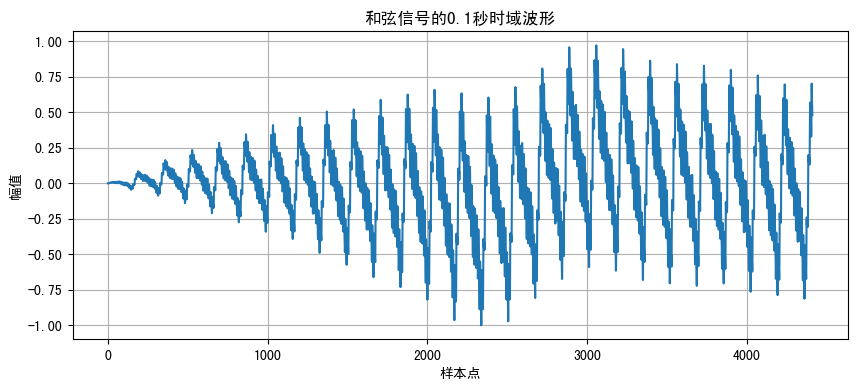

In [32]:
# 时域波形可视化
plt.figure(figsize=(10,4))
segment = mix[:int(0.1*sr)]
plt.plot(segment)
plt.title('和弦信号的0.1秒时域波形')
plt.xlabel('样本点')
plt.ylabel('幅值')
plt.grid(True)
plt.show()
# 注释：可见多频率叠加后波形复杂

# Step 6: 频域分析（FFT与声谱图）

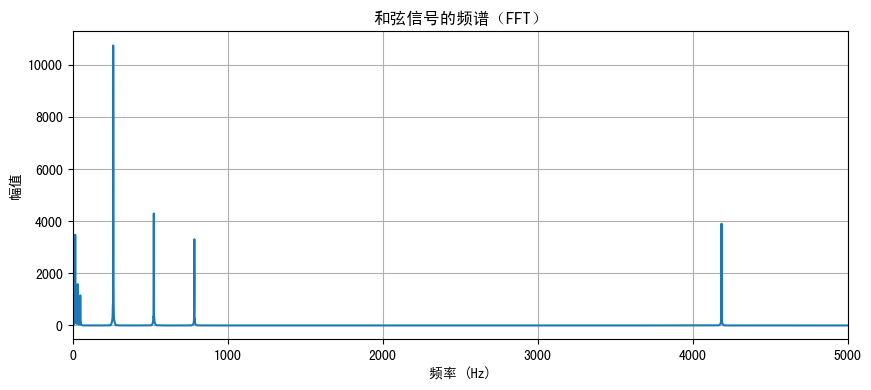

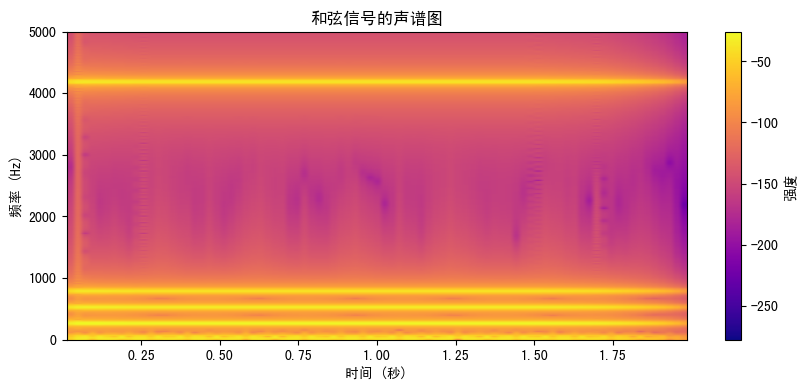

In [33]:
# FFT分析
fft = np.fft.rfft(mix)
freqs = np.fft.rfftfreq(len(mix), 1/sr)
plt.figure(figsize=(10,4))
plt.plot(freqs, np.abs(fft))
plt.title('和弦信号的频谱（FFT）')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅值')
plt.xlim(0, 5000)
plt.grid(True)
plt.show()
# 声谱图
plt.figure(figsize=(10,4))
plt.specgram(mix, NFFT=2048, Fs=sr, noverlap=1024, cmap='plasma')
plt.title('和弦信号的声谱图')
plt.xlabel('时间 (秒)')
plt.ylabel('频率 (Hz)')
plt.colorbar(label='强度')
plt.ylim(0, 5000)
plt.show()
# 注释：可见C0、C4、C8频率均被合成

# Step 7: 播放和弦并听觉评价

In [34]:
display(Audio(mix, rate=sr))
# 注释：中频C4最明显，极低C0和极高C8较难分辨，体现人耳频率敏感性

# 作业学习心得

## 主要收获

1. **深入理解乐音频率可视化原理**  
   通过本次作业，我掌握了乐音频率的计算方法，理解了科学音高记谱（SPN）与实际频率的对应关系，并能用编程实现频率的自动生成与分组。

2. **提升了数据处理与可视化能力**  
   学会了如何筛选人耳可听范围的音符，按八度分组，并用 matplotlib 和 seaborn 绘制分布图，增强了图表的表达力和美观度。

3. **体会了乐理知识与编程结合的乐趣**  
   通过频率分布图，直观感受到不同八度、不同音高在可听范围内的分布规律，以及标准音高（A4=440Hz）的特殊地位。

## 遇到的挑战

- 需要处理大量音名和频率，保证排序和分组正确。
- 图表元素较多，需合理布局防止标签重叠和信息丢失。
- 兼顾美观和信息表达，调整配色和图例显示。

## 改进建议

- 可以尝试对频率轴使用对数刻度，更好地展示高低频分布。
- 增加交互式可视化（如 plotly），提升用户体验。
- 深入探索乐音频率与乐理知识的结合，拓展应用场景。

## 总结

本次作业不仅加深了我对乐音频率和科学记谱的理解，也锻炼了数据处理和可视化能力。希望未来能将这些技能应用到更复杂的音乐分析和音频处理项目中。